
# ST115 Managing and visualising data

## Lecture 3: Data wrangling with Pandas

### 2022/23 Lent Term

## Today's plan

Data exploration and data wrangling on _tabular data_ using Pandas.

* Tabular data
* Pandas: quick recap
* Data exploration
* Data wrangling
    * Remove unnecessary data
    * Handle missing data

## Pandas

Pandas is a third party library for data analysis, integrating low level modelling tools such as importing, cleaning and aggregating tabular data.
* Main object: _heterogeneous_ `DataFrame`

##  Pandas basics

If you have not learned `Pandas` before, please finish the following before continuing with the lecture:
* [Introduction to Pandas](https://app.dataquest.io/m/291)
* [Exploring Data with pandas: Fundamentals](https://app.dataquest.io/m/381)
* [Exploring Data with pandas: Intermediate](https://moodle.lse.ac.uk/mod/url/view.php?id=1003173)
* [Revision slides](https://moodle.lse.ac.uk/pluginfile.php/2050517/mod_resource/content/0/revision_4_slides.pdf) (optional)


## Install Pandas

* Students who are using Anaconda, you should already have Pandas installed
* For students who do not have Pandas, you can install it by using the following commands in a terminal:

```
conda install pandas
```
 
or 

```
pip install pandas
```

depending on which package management system you are using.

## Pandas: import

Following the official recommendation, we import the module using the following way:

In [1]:
import pandas as pd

Note that the behaviour of different versions of `Pandas` may be slightly different. In today's lecture we are using version _1.4.4_.
* You can check your version of `Pandas` by:

In [2]:
pd.__version__

'1.4.2'

(You can always check for the version of almost any library using `__version__`)

# Tabular data

## Tabular data

Tabular data is data in a two-dimensional rectangular table, structured with _rows_ and _columns_. 
* Examples:
    * Bitcoin historical data from [Yahoo! Finance](https://finance.yahoo.com/quote/BTC-USD/history?p=BTC-USD): <center><img src="figs/bitcoin_yahoo.png" width="700"></center>
    * The premier league player value dataset (Workshop 1):

In [2]:
# we will talk about the code later
pl_players = pd.read_csv('data/pl_player_value.csv')
pl_players.head(3)

,name,club,position,value
0,Yaser Asprilla,Watford,Attacking Midfield,0.90
1,Moisés Caicedo,Brighton & Hove Albion,Central Midfield,4.05
2,Edo Kayembe,Watford,Defensive Midfield,1.17


## Data layout in tables
* Rows:
    * Each row represents one record or observation of an object or event 
    * Each row can have multiple pieces of information
    * Each row has the same structure
* Columns: 
    * Each column represents an attribute or property of the observations
        * Each column contains only one type of data
    * Labeled with a header
    
Each table contains a set of observations of the same kind of object or event.

## CSV files

Often tabular data is stored in _csv_ files.
* CSV stands for _comma-separated values_
    * Values are separated by the _delimiter_ `,`
    * file has the extension `.csv`
* Examples:
    * Bitcoin data downloaded from Yahoo! Finance: <center><img src="figs/bitcoin_csv.png" width="700"></center>
    * Premier league player data: <center><img src="figs/pl_csv.png" width="500"></center>


## Loading csv files into Python as `pd.DataFrame`

We can do so very easily with the use of [`pd.read_csv()`](https://pandas.pydata.org/docs/reference/api/pandas.read_csv.html). For example:

In [6]:
pl_players = pd.read_csv('data/pl_player_value.csv')
pl_players.head()   # first 5 rows

,name,club,position,value
0,Yaser Asprilla,Watford,Attacking Midfield,0.90
1,Moisés Caicedo,Brighton & Hove Albion,Central Midfield,4.05
2,Edo Kayembe,Watford,Defensive Midfield,1.17
3,Luka Ilic,Manchester City,Attacking Midfield,0.72
4,Hayao Kawabe,Wolverhampton Wanderers,Central Midfield,1.17


## Other file types for tabular data

Text files with extension `.txt` and Excel files (e.g. with extension `xlsx`) are other common file types for tabular data. 

Text file example: [Faculty Salary Data](https://courses.washington.edu/b517/Datasets/datasets.html)
<center><img src="figs/salary.png" width="700"></center>

Note here each field is separated by _whitespace_.


## Other file types for tabular data (continue)

When whitespace is used to separate the data, we can still load the data into pandas `DataFrame` using `read_csv()`.
* But we need to provide the additional argument `delim_whitespace = True`
* For example:

In [6]:
salary = pd.read_csv('https://courses.washington.edu/b517/Datasets/SalaryData.txt', 
                     delim_whitespace=True)
salary.head()   # first 5 rows

HTTPError: HTTP Error 404: 

## Other file types for tabular data (continue)

Excel file example: Bitcoin data in `xlsx`
<br><center><img src="figs/bitcoin_excel.png" width="600"></center>
* Load into `pd.DataFrame` using `pd.read_excel()`:

In [3]:
# Note you may need to install openpyxl to run the following code
bitcoin = pd.read_excel(open('data/BTC-USD.xlsx', 'rb'))
bitcoin

,Date,Open,High,Low,Close,Adj Close,Volume
0,2021-01-12,35516.359375,36568.527344,32697.976563,33922.960938,33922.960938,7.477328e+10
1,2021-01-13,33915.121094,37599.960938,32584.667969,37316.359375,37316.359375,6.936432e+10
2,2021-01-14,37325.109375,39966.406250,36868.562500,39187.328125,39187.328125,6.361599e+10
3,2021-01-15,39156.707031,39577.710938,34659.589844,36825.367188,36825.367188,6.776076e+10
4,2021-01-16,36821.648438,37864.367188,35633.554688,36178.140625,36178.140625,5.770619e+10
...,...,...,...,...,...,...,...
361,2022-01-08,41561.464844,42228.941406,40672.277344,41733.941406,41733.941406,2.806636e+10
362,2022-01-09,41734.726563,42663.949219,41338.160156,41911.601563,41911.601563,2.129438e+10
363,2022-01-10,41910.230469,42199.484375,39796.570313,41821.261719,41821.261719,3.210423e+10
364,2022-01-11,NaN,NaN,NaN,NaN,NaN,NaN


# Pandas recap

## Pandas recap

* Main data structures
* Selecting required data

## Pandas data structures

* `DataFrame`: 2D data structure for tabular data
    * Similar to `R` `data.frame`
    * _Heterogeneous_: Different columns can have different types
* `Series`: 1D homogeneous data, can be considered as the "columns"
* `Index`: Sequence of row labels
<center><img src="figs/df_annotate.png" width="600"></center>

`DataFrame` can be considered as a dictionary of `Series` that all share the same index. `Series` is similar to 1D `np.ndarray` but with row labels (Index).

## Pandas `DataFrame` / `Series` vs NumPy `ndarray`

* Similarities:
    * Syntax is similar
    * Fast vectorised operations
* Differences: 
    * Pandas is for heterogeneous data
    * Pandas for 1 and 2 dimensional data
    * Pandas data are labeled by row labels

## Pandas data structures: demo

We can use `index` to get the Index. For example:

In [7]:
pl_players.head()

,name,club,position,value
0,Yaser Asprilla,Watford,Attacking Midfield,0.90
1,Moisés Caicedo,Brighton & Hove Albion,Central Midfield,4.05
2,Edo Kayembe,Watford,Defensive Midfield,1.17
3,Luka Ilic,Manchester City,Attacking Midfield,0.72
4,Hayao Kawabe,Wolverhampton Wanderers,Central Midfield,1.17


In [8]:
pl_players.index

RangeIndex(start=0, stop=525, step=1)

In [9]:
type(pl_players.index)

pandas.core.indexes.range.RangeIndex

## Pandas data structures: demo (continue)

We can use `[]` with the column label to get a "column" and we can see that it is a `Series` with the same `Index`. For example:

In [10]:
pl_players['value']

0       0.90
1       4.05
2       1.17
3       0.72
4       1.17
       ...  
520    15.30
521     6.30
522     0.72
523     5.40
524     3.60
Name: value, Length: 525, dtype: float64

In [11]:
type(pl_players['value'])

pandas.core.series.Series

In [12]:
pl_players['value'].index

RangeIndex(start=0, stop=525, step=1)

## Pandas: index

The row labels that constitute an index do not have to be unique nor numerical. For example:

In [9]:
pl_players_idx_by_club = pl_players.set_index('club') # use the column "club" as index
pl_players_idx_by_club.head() 

,name,position,value
club,,,
Watford,Yaser Asprilla,Attacking Midfield,0.90
Brighton & Hove Albion,Moisés Caicedo,Central Midfield,4.05
Watford,Edo Kayembe,Defensive Midfield,1.17
Manchester City,Luka Ilic,Attacking Midfield,0.72
Wolverhampton Wanderers,Hayao Kawabe,Central Midfield,1.17


On the other hand, column labels have to be unique.

## Pandas: selecting columns

We can select multiple columns by providing a list of column labels:

In [14]:
pl_players[['name', 'value']].head()

,name,value
0,Yaser Asprilla,0.90
1,Moisés Caicedo,4.05
2,Edo Kayembe,1.17
3,Luka Ilic,0.72
4,Hayao Kawabe,1.17


Note what we get is a `DataFrame`.

## Pandas: selecting rows

We can slicing like syntax with row numbers. For example:

In [4]:
pl_players[0:2] # first 2 rows

,name,club,position,value
0,Yaser Asprilla,Watford,Attacking Midfield,0.90
1,Moisés Caicedo,Brighton & Hove Albion,Central Midfield,4.05


Note none of the following work:

In [7]:
pl_players["name"].head()

0    Yaser Asprilla
1    Moisés Caicedo
2       Edo Kayembe
3         Luka Ilic
4      Hayao Kawabe
Name: name, dtype: object

In [25]:
pl_players[0]
pl_players[[0,1]]

KeyError: "None of [Int64Index([0, 1], dtype='int64')] are in the [columns]"

As the syntax above is for column selection, and there are not columns called `0`, `1` in `pl_players`.

## Checkpoint 3.1

Consider the following `pd.DataFrame`:

In [8]:
sample_df = pd.DataFrame({1: ['a', 'b', 'c'], 0: ['d', 'e', 'f'], '0': ['g', 'h', 'i']})
sample_df

,1,0,0
0,a,d,g
1,b,e,h
2,c,f,i


And find out what you get from the following:

In [19]:
sample_df[0]

0    d
1    e
2    f
Name: 0, dtype: object

In [21]:
sample_df[[0]]

,0
0,d
1,e
2,f


In [22]:
sample_df['0']

0    g
1    h
2    i
Name: 0, dtype: object

In [23]:
sample_df[0:2]

,1,0,0
0,a,d,g
1,b,e,h


In [24]:
sample_df[[0,1]]

,0,1
0,d,a
1,e,b
2,f,c


## Solution

In [19]:
sample_df[0]

0    d
1    e
2    f
Name: 0, dtype: object

This gives `Series` from the second column.

In [20]:
sample_df[[0]]

,0
0,d
1,e
2,f


This gives `DataFrame` with the second column from `sample_df`.

In [21]:
sample_df['0']

0    g
1    h
2    i
Name: 0, dtype: object

This gives `Series` from the third column.

## Solution (continue)

In [22]:
sample_df[0:2]

,1,0,0
0,a,d,g
1,b,e,h


This gives `DataFrame` with the first 2 rows from `sample_df`.

In [23]:
sample_df[[0,1]]

,0,1
0,d,a
1,e,b
2,f,c


This gives `DataFrame` with the second and first columns from `sample_df`.

## Pandas: selecting rows using a condition

We can select the rows based on some conditions by `df[condition]`.
* The syntax is similar to NumPy
* Example: Select all rows for position is `'Attacking Midfield'`:

In [26]:
pl_players[pl_players['position'] == 'Attacking Midfield'].head()

,name,club,position,value
0,Yaser Asprilla,Watford,Attacking Midfield,0.90
3,Luka Ilic,Manchester City,Attacking Midfield,0.72
17,Kevin De Bruyne,Manchester City,Attacking Midfield,81.00
18,Bruno Fernandes,Manchester United,Attacking Midfield,81.00
27,Mason Mount,Chelsea,Attacking Midfield,67.50


## Pandas: selecting rows using a condition

We can chain up multiple conditions by `&` and/or `|` like `np.ndarray`.
* Example: Select all rows for position is `'Attacking Midfield'` _and_ `club` is `'Manchester United'`:

In [27]:
pl_players[(pl_players['position'] == 'Attacking Midfield') & 
           (pl_players['club'] == 'Manchester United')]

,name,club,position,value
18,Bruno Fernandes,Manchester United,Attacking Midfield,81.0
169,Jesse Lingard,Manchester United,Attacking Midfield,18.0
414,Juan Mata,Manchester United,Attacking Midfield,2.7


* Example: Select all rows for `club` is `'Manchester United'` or `'Manchester City'`:

In [28]:
pl_players[(pl_players['club'] == 'Manchester United') | 
           (pl_players['club'] == 'Manchester City')].head(3)

,name,club,position,value
3,Luka Ilic,Manchester City,Attacking Midfield,0.72
17,Kevin De Bruyne,Manchester City,Attacking Midfield,81.00
18,Bruno Fernandes,Manchester United,Attacking Midfield,81.00


Like NumPy, we should not use `and` or `or`, and `()` is required.

## Pandas: matching multiple values

The `isin()` method makes it more convenient to find rows that match one of many possible values.
* Example: Select all rows for `club` is `'Manchester United'` or `'Manchester City'`:

In [29]:
pl_players[pl_players['club'].isin(['Manchester United', 'Manchester City'])].head(3)

,name,club,position,value
3,Luka Ilic,Manchester City,Attacking Midfield,0.72
17,Kevin De Bruyne,Manchester City,Attacking Midfield,81.00
18,Bruno Fernandes,Manchester United,Attacking Midfield,81.00


Alternatively we can do the following:

library_name.function_name()

In [30]:
pl_players[pl_players['club'].str.startswith('Manchester')].head(3)

,name,club,position,value
3,Luka Ilic,Manchester City,Attacking Midfield,0.72
17,Kevin De Bruyne,Manchester City,Attacking Midfield,81.00
18,Bruno Fernandes,Manchester United,Attacking Midfield,81.00


We will talk more about these string manipulation later in the course.

## Pandas: more selections

To specify the selection for _both_ rows and columns, or to select just a row by indexing or multiple columns by slicing, use `loc[]` and `iloc[]`.
* Warning: here is just a quick demonstration
    * Please see [here](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.loc.html) and [here](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.iloc.html) to learn more about them

## Pandas: `loc[]`

`loc[]` allows you to select rows and columns by:
* Labels
* Boolean array

One example: selecting rows by conditions, and columns by slicing on labels:

In [31]:
pl_players.loc[(pl_players['club'] == 'Manchester United'), 'name':'club'].head(3)

,name,club
18,Bruno Fernandes,Manchester United
21,Marcus Rashford,Manchester United
22,Jadon Sancho,Manchester United


Note:
* Similar to NumPy 2D array, before the comma represents the rows to select, and after the comma represents the columns to select
* When slicing with `loc[]`, end points are included!

## Pandas: `loc[]` (continue)

Another example: selecting rows by a list of row labels:

In [9]:
pl_players[[0,3]].head()

KeyError: "None of [Int64Index([0, 3], dtype='int64')] are in the [columns]"

In [32]:
pl_players.loc[[0,3]].head()

,name,club,position,value
0,Yaser Asprilla,Watford,Attacking Midfield,0.90
3,Luka Ilic,Manchester City,Attacking Midfield,0.72


Note: 
* Similar to NumPy 2D array, if we only provide one object, we only specify the rows we want to select

## Pandas: `iloc[]`

`iloc[]` allows you to select rows and columns by the location indexes.

Examples:

In [41]:
pl_players_idx_by_club.iloc[2:4, 1]
# [row, column]

club
Watford            Defensive Midfield
Manchester City    Attacking Midfield
Name: position, dtype: object

In [44]:
pl_players.iloc[[1,3]]

,name,club,position,value
1,Moisés Caicedo,Brighton & Hove Albion,Central Midfield,4.05
3,Luka Ilic,Manchester City,Attacking Midfield,0.72


## Pandas: `loc[]` vs `iloc[]`

Advantages of `loc[]` over `iloc[]`:
* Easier to read
* Harder to make mistakes
* May work even if the order of rows or columns changed

But there are situations where `iloc[]` is useful.

## Checkpoint 3.2

Continue to work on the same `DataFrame` as Checkpoint 3.1:

In [45]:
sample_df = pd.DataFrame({1: ['a', 'b', 'c'], 0: ['d', 'e', 'f'], '0': ['g', 'h', 'i']})
sample_df

,1,0,0
0,a,d,g
1,b,e,h
2,c,f,i


And find out what you get from the following:

In [46]:
sample_df[0:2]

,1,0,0
0,a,d,g
1,b,e,h


In [47]:
sample_df.iloc[0:2]

,1,0,0
0,a,d,g
1,b,e,h


In [50]:
sample_df.loc[0:2]

,1,0,0
0,a,d,g
1,b,e,h
2,c,f,i


## Checkpoint 3.2 (continue)

In [10]:
sample_df[:,0]

InvalidIndexError: (slice(None, None, None), 0)

In [52]:
sample_df.loc[:,0]

0    d
1    e
2    f
Name: 0, dtype: object

In [53]:
sample_df.iloc[:,0]

0    a
1    b
2    c
Name: 1, dtype: object

In [54]:
sample_df.loc[:,'0']

0    g
1    h
2    i
Name: 0, dtype: object

In [55]:
sample_df.loc[:,['0']]

,0
0,g
1,h
2,i


In [56]:
sample_df.iloc[:,'0']

ValueError: Location based indexing can only have [integer, integer slice (START point is INCLUDED, END point is EXCLUDED), listlike of integers, boolean array] types

## Solution

In [57]:
sample_df[0:2]

,1,0,0
0,a,d,g
1,b,e,h


In [58]:
sample_df.iloc[0:2]

,1,0,0
0,a,d,g
1,b,e,h


In [59]:
sample_df.loc[0:2]

,1,0,0
0,a,d,g
1,b,e,h
2,c,f,i


Remember with `loc`, the slicing includes the end points. Note all return a `DataFrame`.

## Solution (continue)

In [ ]:
sample_df[:,0]

This throws an error as with `[]` only, we can only select rows or columns but not both.

In [38]:
sample_df.loc[:,0]

0    d
1    e
2    f
Name: 0, dtype: object

This gives the column with label `0`  as `Series`. 

In [39]:
sample_df.iloc[:,0]

0    a
1    b
2    c
Name: 1, dtype: object

This gives the column with index 0 as `Series`.

## Solution (continue)

In [40]:
sample_df.loc[:,'0']

0    g
1    h
2    i
Name: 0, dtype: object

This gives the column with label `'0'`  as `Series`. 

In [41]:
sample_df.loc[:,['0']]

,0
0,g
1,h
2,i


This gives the column with label `'0'`  as `DataFrame`. 

In [ ]:
sample_df.iloc[:,'0']

This throws an error as `iloc` is for index, not labels.

## Arithmetic and data alignment

Like `np.ndarray`, we can do element-wise calculations (and other manipulations) very easily on `Pandas` `Series` and `DataFrame`. For example:

In [11]:
marks = pd.DataFrame({'ps_1': [70, 100, 82], 'ps_2': [88, 92, 83]}, 
                     index=['Harry', 'Hermione', 'Ron'])
marks

,ps_1,ps_2
Harry,70,88
Hermione,100,92
Ron,82,83


In [12]:
marks['ps_1'] + marks['ps_2']

Harry       158
Hermione    192
Ron         165
dtype: int64

However, notice that the alignment is based on the row label (`Index`), not the location:

In [14]:
ls = [100, 70, 90]
type(pd.Series(ls))

pandas.core.series.Series

In [16]:
ps_3 = pd.Series([100, 70, 90], index=['Hermione', 'Ron', 'Harry'])
(marks['ps_1'] + ps_3)/2

Harry        80.0
Hermione    100.0
Ron          76.0
dtype: float64

In [18]:
marks['ps_3'] = ps_3
marks

,ps_1,ps_2,ps_3
Harry,70,88,90
Hermione,100,92,100
Ron,82,83,70


# Data exploration

## Recall: Data science project lifecycle

Before we can analyse the data, we should explore the data:
<br><center><img src="figs/ds_process_2.png" width="600"></center>

## Data exploration

Data exploration helps to develop a sound understanding of the data we need before doing the actual analysis. For example:
* What does the data contain? 
    * How many observations are there? What attributes do we have? 
* Do we need some more data to answer the questions that we have?
* What kind of questions can we ask?
* Are there anomalies or egregious issues? 
* Any interesting patterns?


## Data exploration: common steps

Some common steps of data exploration:
* Quick look of the data to learn about
    * Size of the data
    * Attributes 
* Check if there is any issue with the data (e.g. missing or wrong data)
* Use some simple descriptive statistics / graphs to get some insights about the data

## Data exploration: demo

In this part, we will use the DC character dataset from [FiveThirtyEight](https://github.com/fivethirtyeight/data/tree/master/comic-characters) to demonstrate the data exploration process.

* Following [this article](https://fivethirtyeight.com/features/women-in-comic-books/#fn-8), the question we want to answer is whether DC characters are still dominated by males based on the given dataset

## Load in the data

We load in the data using `pd.read_csv()`:

In [19]:
import pandas as pd
dc = pd.read_csv('data/dc-wikia-data.csv')

## Quick look of the data

We can see what kind of information the dataset provides by quickly have a look of the subset of the data:

In [20]:
display(dc.head(2))

,page_id,name,urlslug,ID,ALIGN,EYE,HAIR,SEX,GSM,ALIVE,APPEARANCES,FIRST APPEARANCE,YEAR
0,1422,Batman (Bruce Wayne),\/wiki\/Batman_(Bruce_Wayne),Secret Identity,Good Characters,Blue Eyes,Black Hair,Male Characters,NaN,Living Characters,3093.0,"1939, May",1939.0
1,23387,Superman (Clark Kent),\/wiki\/Superman_(Clark_Kent),Secret Identity,Good Characters,Blue Eyes,Black Hair,Male Characters,NaN,Living Characters,2496.0,"1986, October",1986.0


In [21]:
display(dc.tail(2))

,page_id,name,urlslug,ID,ALIGN,EYE,HAIR,SEX,GSM,ALIVE,APPEARANCES,FIRST APPEARANCE,YEAR
6894,283471,William McKinley (New Earth),\/wiki\/William_McKinley_(New_Earth),Public Identity,Good Characters,NaN,NaN,Male Characters,NaN,Living Characters,NaN,NaN,NaN
6895,150660,Mookie (New Earth),\/wiki\/Mookie_(New_Earth),Public Identity,Bad Characters,Blue Eyes,Blond Hair,Male Characters,NaN,Living Characters,NaN,NaN,NaN


Here we use [`head()`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.head.html) or [`tail()`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.tail.html) to have a look of the first / last few rows. What is `GSM`?

## Description of the data

From the GitHub page where the data is available:
<br><center><img src="figs/metadata.png" width="550"></center>

This page provides us the _metadata_ of the DC character data.

## Metadata

Metadata is "data about data", i.e. data that provides information about the main data, but it is not part of the main data.

* For the DC character dataset: 
    * Introduction of the data
    * Data source (including data range)
    * Information about the columns

## Check if it contains all information we need

We can see that for each character, we have the information about:
* Name (with the universe information)
* Some information about where the data is from (url, page_id)
* Characteristics of the character like identity, gender, align, physical appearance
* Appearances in the comic like year of first appearance and number of appearances

For our analysis, we need the gender and the year of appearance, and maybe we will use alignment and the number of appearances
* The dataset has all the information we need (although it is not up-to-date), but it also has some information we do not need (e.g. physical appearance)

## Quick look of the data - identify possible issues

We can also notice some possible issues with the data:

In [3]:
display(dc.head(1))
display(dc.tail(1))

,page_id,name,urlslug,ID,ALIGN,EYE,HAIR,SEX,GSM,ALIVE,APPEARANCES,FIRST APPEARANCE,YEAR
0,1422,Batman (Bruce Wayne),\/wiki\/Batman_(Bruce_Wayne),Secret Identity,Good Characters,Blue Eyes,Black Hair,Male Characters,NaN,Living Characters,3093.0,"1939, May",1939.0


,page_id,name,urlslug,ID,ALIGN,EYE,HAIR,SEX,GSM,ALIVE,APPEARANCES,FIRST APPEARANCE,YEAR
6895,150660,Mookie (New Earth),\/wiki\/Mookie_(New_Earth),Public Identity,Bad Characters,Blue Eyes,Blond Hair,Male Characters,NaN,Living Characters,NaN,NaN,NaN


* Missing data: `NaN` hints that the corresponding data is not available in the dataset
* Some pre-processing may be needed: 
    * `YEAR` is now floating point numbers
    * Depending on the analysis, we may want to separate the information of actual name and universe from the column "name"

## Get the dimension of the data

For tabular data, the number of observations is equal to the number of rows and the number of attributes (or variables) is equal to the number of columns.

For `pd.DataFrame`, we can quickly check the dimension of the data by [`shape`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.shape.html?highlight=shape):

In [4]:
dc.shape

(6896, 13)

The shape is a tuple with the number of rows and the number of columns.

## Data type

Check if the type of data is what you expected by `dtypes`:

In [5]:
dc.dtypes 

page_id               int64
name                 object
urlslug              object
ID                   object
ALIGN                object
EYE                  object
HAIR                 object
SEX                  object
GSM                  object
ALIVE                object
APPEARANCES         float64
FIRST APPEARANCE     object
YEAR                float64
dtype: object

In [24]:
dc[["YEAR"]].astype(int)

IntCastingNaNError: Cannot convert non-finite values (NA or inf) to integer

* For the variables of interest, we may want to convert "YEAR" and "APPEARANCES" to `int` and "SEX" to `category`
* If we also work on other variables, we may for example want to convert "ALIVE" to bool
* You can also use `info()` to check the type information

## Amount of missing data

Check the amount of missing data: If there are too many missing values, the dataset may not be useful.
* We can check the number of missing data per column in `Pandas` with the following:

In [4]:
# we will learn more about the code later when we talk about missing data
dc.isnull().sum()

page_id                0
name                   0
urlslug                0
ID                  2013
ALIGN                601
EYE                 3628
HAIR                2274
SEX                  125
GSM                 6832
ALIVE                  3
APPEARANCES          355
FIRST APPEARANCE      69
YEAR                  69
dtype: int64

* For the variables that we need ("NAME", "ALIGN", "SEX", "APPEARANCES" and "YEAR") have only relatively small amount of missing data
    * We will see how we can handle missing data later
* If our analysis requires some variables like "EYE" which have a large ratio of missing data, we need to be very cautious

## Descriptive statistics

A descriptive statistic quantitatively describes or summarises features from a collection of data.
* We can use some simple descriptive statistic to have some more idea about the data like:
    * Central tendency: what is the "common" or "representative" value?
    * Data dispersion: the spread of the data - do we have a wide range of value?

## Descriptive statistics in `Pandas`

For Pandas, like `np.ndarray`, we can use some methods to get some descriptive statistic. For example:
* Maximum values:

In [5]:
dc.max(numeric_only = True)

page_id        404010.0
APPEARANCES      3093.0
YEAR             2013.0
dtype: float64

Note here by default you get the calculation along the axis 0.

* Most appearance values:

In [6]:
dc['ALIGN'].mode()

0    Bad Characters
Name: ALIGN, dtype: object

Also note that by default, missing data is ignored.

## Some insights from descriptive statistics

From the statistics from the previous slide, we already get some useful insights:
* Bad characters are most appearing alignment
* The most recently debuted character is from 2013 - the dataset is not up-to-date!

## Descriptive statistics in `Pandas` (continue)

Instead of calculating the statistics one by one, we can use [`describe()`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.describe.html) to generate a selection of descriptive statistics:

In [7]:
dc.describe(include = 'all')

,page_id,name,urlslug,ID,ALIGN,EYE,HAIR,SEX,GSM,ALIVE,APPEARANCES,FIRST APPEARANCE,YEAR
count,6896.000000,6896,6896,4883,6295,3268,4622,6771,64,6893,6541.000000,6827,6827.000000
unique,NaN,6896,6896,3,4,17,17,4,2,2,NaN,774,NaN
top,NaN,Batman (Bruce Wayne),\/wiki\/Batman_(Bruce_Wayne),Public Identity,Bad Characters,Blue Eyes,Black Hair,Male Characters,Homosexual Characters,Living Characters,NaN,"2010, December",NaN
freq,NaN,1,1,2466,2895,1102,1574,4783,54,5200,NaN,78,NaN
mean,147441.209252,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,23.625134,NaN,1989.766662
std,108388.631149,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,87.378509,NaN,16.824194
min,1380.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,1935.000000
25%,44105.500000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.000000,NaN,1983.000000
50%,141267.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.000000,NaN,1992.000000
75%,213203.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15.000000,NaN,2003.000000


Notice that not all statistics are available for all variables. Why?

## Types of attributes / variables

* Quantitative data (i.e. numerical), which can either be:
    * Discrete: a finite number of values are possible in any bounded interval
        * Example: Number of appearance of characters
    * Continuous: an infinite number of values are possible in any bounded interval
        * Example: Height of people

## Types of attributes / variables (continue)

* Categorical data:
    * Ordinal: non-numerical but has ranking
        * Example: Level of Python of students
    * Nominal: no inherent order among the values
        * Example: Eye colours of the characters

## Descriptive statistics: central tendency

Mean, median and mode are common statistics used to measure central tendency.
* Mean: arithmetic average value 
    * e.g. mean of $1, 3, 2, 7, 7$ is $4$
* Median: "the middle" value
    * e.g. median of $1, 3, 2, 7, 7$ is $3$
* Mode: the most appearing value
    * e.g. mode of $1, 3, 2, 7, 7$ is $7$
    * Useful for categorical data

## Measure of central tendency in Pandas

When using `describe()`, mean is in the `mean` row, median is in the `50%` row and mode is in the `top` row. For example:

In [8]:
# only the relevant rows and a few columns are shown
dc.describe(include = 'all').loc[['mean', '50%', 'top'], 'SEX':]

,SEX,GSM,ALIVE,APPEARANCES,FIRST APPEARANCE,YEAR
mean,NaN,NaN,NaN,23.625134,NaN,1989.766662
50%,NaN,NaN,NaN,6.000000,NaN,1992.000000
top,Male Characters,Homosexual Characters,Living Characters,NaN,"2010, December",NaN


## Measure of central tendency in Pandas (continue)

Alternatively, we can use the methods `mean()`, `median()` and `mode()`. For example:

In [9]:
dc['APPEARANCES'].mean()

23.62513377159456

In [12]:
dc['APPEARANCES'].median()

6.0

In [13]:
dc['APPEARANCES'].mode()

0    1.0
dtype: float64

## Measure of central tendency in Pandas (continue)

Alternatively, you can use `aggregate()` with numpy universal functions:

In [25]:
import numpy as np
# note here we only calculate mean and median as there is no universal function for mode
dc['APPEARANCES'].aggregate([np.mean, np.median]) 

mean      23.625134
median     6.000000
Name: APPEARANCES, dtype: float64

Question: Why different values are given for different measures? Which one should we use?

## Central tendency: mean vs median 

The mean is more sensitive to extreme values (outliers) when comparing with median. For example:

In [11]:
import numpy as np
original_data = np.array([0, 1, 2, 4, 5, 6, 7, 8, 9, 10])
print('mean:', original_data.mean(), 'median: ', np.median(original_data))

mean: 5.2 median:  5.5


In [12]:
data_with_outlier = np.array([0, 1, 2, 4, 5, 6, 7, 8, 9, 1000])
print('mean:', data_with_outlier.mean(), 'median: ', np.median(data_with_outlier))

mean: 104.2 median:  5.5


* With outlier, median provides a better measure of "central" or "representative" value
* The difference between mean and median also gives us some idea about the _skewness_ of the data

## Central tendency: DC dataset

For the DC dataset, some main characters appear much more frequently than other characters:

In [13]:
dc.sort_values('APPEARANCES', ascending=False)[['name', 'APPEARANCES']].head()

,name,APPEARANCES
0,Batman (Bruce Wayne),3093.0
1,Superman (Clark Kent),2496.0
2,Green Lantern (Hal Jordan),1565.0
3,James Gordon (New Earth),1316.0
4,Richard Grayson (New Earth),1237.0


Therefore, while on average the number of appearances of each character is $23.6$ (median), half of the characters appear not more than 6 times (median) and 1 is the most frequently seen number of appearances (mode).

## Central tendency: DC dataset (continue)

From the descriptive statistics for the categorical data `SEX`, we can also see that the most appearing gender is male:

In [14]:
dc.describe(include = 'all').loc[['mean', '50%', 'top'], 'SEX':]

,SEX,GSM,ALIVE,APPEARANCES,FIRST APPEARANCE,YEAR
mean,NaN,NaN,NaN,23.625134,NaN,1989.766662
50%,NaN,NaN,NaN,6.000000,NaN,1992.000000
top,Male Characters,Homosexual Characters,Living Characters,NaN,"2010, December",NaN


## Measures of dispersion for quantitative variables

The dispersion of a sample of observations measures the variation of the data. 
* Common examples of measures of dispersion are:
    * Range
        * Range = Maximum value - Minimum value
    * Interquartile range (IQR)
        * Difference between the 75th percentile ($Q_3$) and 25th percentiles ($Q_1$) of the data
        * $IQR = Q_3 - Q_1$
    * Variance
    * Standard deviation: square root of variance
    
Variance and standard deviation are good measure of dispersion _if_ the data is roughly normally distributed.

## Measures of dispersion in Pandas

You can get the max and min, 25th percentile , 75th percentile from `describe()`:

In [19]:
dc.describe(include = 'all').loc[['min', 'max', '25%', '75%', 'std']]

,page_id,name,urlslug,ID,ALIGN,EYE,HAIR,SEX,GSM,ALIVE,APPEARANCES,FIRST APPEARANCE,YEAR
min,1380.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,1935.000000
max,404010.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3093.000000,NaN,2013.000000
25%,44105.500000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.000000,NaN,1983.000000
75%,213203.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15.000000,NaN,2003.000000
std,108388.631149,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,87.378509,NaN,16.824194


And calculate range and IQR from there.

## Measures of dispersion in Pandas (continue)

Or you can use some methods like `max()`, `min()`, `quantile()`, etc to calculate them. For example:

* Range:

In [20]:
dc.APPEARANCES.max() - dc.APPEARANCES.min()

3092.0

* IQR:

In [21]:
dc.APPEARANCES.quantile(0.75) - dc.APPEARANCES.quantile(0.25)

13.0

* Standard deviation:

In [22]:
dc.APPEARANCES.std()

87.37850877836128

## Measures of variability in categorical data

We are not going into details how we can measure variability of categorical data here, but we can, for example, knows the number of distinct values by `nunique()`.
* Example:

In [23]:
dc['SEX'].nunique()

4

You can find out the unique values by `unique()`. For example:

In [24]:
dc['SEX'].unique()

array(['Male Characters', 'Female Characters', nan,
       'Genderless Characters', 'Transgender Characters'], dtype=object)

We can see there are not just 'Male' and 'Female', but also 'Genderless', 'Transgender'. 

## Counting appearances 

To count the appearance for each category, we can use `value_counts()`. For example:

In [25]:
dc['SEX'].value_counts()

Male Characters           4783
Female Characters         1967
Genderless Characters       20
Transgender Characters       1
Name: SEX, dtype: int64

To calculate percentage count, use additional argument `normalize = True`:

In [26]:
dc['SEX'].value_counts(normalize=True)*100

Male Characters           70.639492
Female Characters         29.050362
Genderless Characters      0.295377
Transgender Characters     0.014769
Name: SEX, dtype: float64

## Counting appearances (continue)

Another example, showing by default result is sorted by counts in descending order:

In [27]:
dc['YEAR'].value_counts().head()

2006.0    303
1988.0    286
2010.0    279
1989.0    266
1987.0    254
Name: YEAR, dtype: int64

## Other insights we can get from descriptive statistics 

* From min and max:
    * Any wrong data:
        * Minimum for `APPEARANCES` has to be positive (from row "min")
        * Minimum for `YEAR` should not be smaller than 1900; Maximum for `YEAR` should not be larger than 2022
    * Cover required data range:
        * Maximum for `YEAR` is 2013 - the dataset does not seem to be updated
* Missing data (from row "count")

## Other insights we can get from descriptive statistics (continue)

In [28]:
dc.describe(include = 'all')[['ALIGN', 'SEX', 'APPEARANCES', 'YEAR']]

,ALIGN,SEX,APPEARANCES,YEAR
count,6295,6771,6541.000000,6827.000000
unique,4,4,NaN,NaN
top,Bad Characters,Male Characters,NaN,NaN
freq,2895,4783,NaN,NaN
mean,NaN,NaN,23.625134,1989.766662
std,NaN,NaN,87.378509,16.824194
min,NaN,NaN,1.000000,1935.000000
25%,NaN,NaN,2.000000,1983.000000
50%,NaN,NaN,6.000000,1992.000000
75%,NaN,NaN,15.000000,2003.000000


# Data wrangling

## Data wrangling

Data wrangling (or data cleaning, data munging) refers to a variety of processes designed to transform raw data into more readily used formats
* Examples:
    * Filtering: removing unnecessary or irrelevant data
    * Formating the data
    * Handle extreme outliers, missing, duplicate or wrong values in data
    * Merging multiple data sources
    * Reshaping the data
    
How to perform data wrangling depends on the data you are working on and the goal you are trying to achieve.

# Filtering data

## Removing unnecessary columns

Previously we have seen that we only need to keep columns like `name`, `SEX`, `APPEARANCES`, `YEAR`, `ALIGN`.

* In pandas, we can discard the rows or columns by using `drop()`:

In [15]:
import pandas as pd
dc = pd.read_csv('data/dc-wikia-data.csv')
dc.head(2)

,page_id,name,urlslug,ID,ALIGN,EYE,HAIR,SEX,GSM,ALIVE,APPEARANCES,FIRST APPEARANCE,YEAR
0,1422,Batman (Bruce Wayne),\/wiki\/Batman_(Bruce_Wayne),Secret Identity,Good Characters,Blue Eyes,Black Hair,Male Characters,NaN,Living Characters,3093.0,"1939, May",1939.0
1,23387,Superman (Clark Kent),\/wiki\/Superman_(Clark_Kent),Secret Identity,Good Characters,Blue Eyes,Black Hair,Male Characters,NaN,Living Characters,2496.0,"1986, October",1986.0


In [16]:
# axis = 1 means we drop the column(s), inplace means to change the original data
dc.drop('page_id', axis = 1, inplace = True) 
dc.head(2)

,name,urlslug,ID,ALIGN,EYE,HAIR,SEX,GSM,ALIVE,APPEARANCES,FIRST APPEARANCE,YEAR
0,Batman (Bruce Wayne),\/wiki\/Batman_(Bruce_Wayne),Secret Identity,Good Characters,Blue Eyes,Black Hair,Male Characters,NaN,Living Characters,3093.0,"1939, May",1939.0
1,Superman (Clark Kent),\/wiki\/Superman_(Clark_Kent),Secret Identity,Good Characters,Blue Eyes,Black Hair,Male Characters,NaN,Living Characters,2496.0,"1986, October",1986.0


## Removing unnecessary columns (continue)

Alternately, you can select the columns you want:

In [26]:
dc = dc[['name', 'SEX', 'APPEARANCES', 'YEAR', 'ALIGN']]
display(dc.head(3))
display(dc.tail(3))

,name,SEX,APPEARANCES,YEAR,ALIGN
0,Batman (Bruce Wayne),Male Characters,3093.0,1939.0,Good Characters
1,Superman (Clark Kent),Male Characters,2496.0,1986.0,Good Characters
2,Green Lantern (Hal Jordan),Male Characters,1565.0,1959.0,Good Characters


,name,SEX,APPEARANCES,YEAR,ALIGN
6893,William Harrison (New Earth),Male Characters,NaN,NaN,Good Characters
6894,William McKinley (New Earth),Male Characters,NaN,NaN,Good Characters
6895,Mookie (New Earth),Male Characters,NaN,NaN,Bad Characters


Note reassignment is needed.

## Filtering data based on some conditions

Depending on the analysis, we may only want to keep rows fulfilling certain conditions. For example:
* Select data with `YEAR` between 2000 to 2010:

In [27]:
dc[dc['YEAR'].between(2000, 2010)].head() # by default include the end points

,name,SEX,APPEARANCES,YEAR,ALIGN
71,Kara Zor-El (New Earth),Female Characters,297.0,2004.0,Good Characters
159,Jason Rusch (New Earth),Male Characters,165.0,2004.0,Good Characters
162,Jaime Reyes (New Earth),Male Characters,164.0,2006.0,Good Characters
246,Crispus Allen (New Earth),Male Characters,116.0,2000.0,Good Characters
263,Mia Dearden (New Earth),Female Characters,109.0,2001.0,Good Characters


## Filtering data based on some conditions (continue)

* Select characters that are not male or female (note characters with no gender information will also be included):

In [18]:
dc[~dc['SEX'].isin(['Male Characters', 'Female Characters'])].head()

,name,SEX,APPEARANCES,YEAR,ALIGN
242,Khaji Da (New Earth),NaN,121.0,1964.0,Good Characters
343,Rosabelle Mendez (New Earth),NaN,86.0,1991.0,Good Characters
352,Parallax (New Earth),NaN,84.0,1994.0,Bad Characters
514,Chemo (New Earth),NaN,58.0,1962.0,Bad Characters
628,Ion (New Earth),NaN,45.0,2006.0,Good Characters


Note `~` is used to invert boolean sequence.

# Formating data

## Renaming columns

Note above we have `name` in lowercase but other columns are in capital letters. We can unify it by renaming the `name` column using `rename()`:

In [6]:
dc.rename(columns=str.upper).head()

,NAME,SEX,APPEARANCES,YEAR,ALIGN
0,Batman (Bruce Wayne),Male Characters,3093.0,1939.0,Good Characters
1,Superman (Clark Kent),Male Characters,2496.0,1986.0,Good Characters
2,Green Lantern (Hal Jordan),Male Characters,1565.0,1959.0,Good Characters
3,James Gordon (New Earth),Male Characters,1316.0,1987.0,Good Characters
4,Richard Grayson (New Earth),Male Characters,1237.0,1940.0,Good Characters


With the use of the string function `upper()`:

In [7]:
str.upper('name')

'NAME'

In [28]:
str.upper('hello')

'HELLO'

## Renaming columns (continue)

Alternatively, we can provide `columns={'name': 'NAME'}` for which it indicates we want to change the column name from `'name'` to `'NAME'`:

In [8]:
dc.rename(columns={'name': 'NAME'}, inplace=True)
dc.head()

,NAME,SEX,APPEARANCES,YEAR,ALIGN
0,Batman (Bruce Wayne),Male Characters,3093.0,1939.0,Good Characters
1,Superman (Clark Kent),Male Characters,2496.0,1986.0,Good Characters
2,Green Lantern (Hal Jordan),Male Characters,1565.0,1959.0,Good Characters
3,James Gordon (New Earth),Male Characters,1316.0,1987.0,Good Characters
4,Richard Grayson (New Earth),Male Characters,1237.0,1940.0,Good Characters


## Converting the variables to the desired type

We can do so using `astype()`. For example:

In [29]:
dc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6896 entries, 0 to 6895
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   name         6896 non-null   object 
 1   SEX          6771 non-null   object 
 2   APPEARANCES  6541 non-null   float64
 3   YEAR         6827 non-null   float64
 4   ALIGN        6295 non-null   object 
dtypes: float64(2), object(3)
memory usage: 269.5+ KB


In [9]:
dc['SEX'] = dc['SEX'].astype('category')
dc['ALIGN'] = dc['ALIGN'].astype('category')

In [10]:
dc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6896 entries, 0 to 6895
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   NAME         6896 non-null   object  
 1   SEX          6771 non-null   category
 2   APPEARANCES  6541 non-null   float64 
 3   YEAR         6827 non-null   float64 
 4   ALIGN        6295 non-null   category
dtypes: category(2), float64(2), object(1)
memory usage: 175.6+ KB


## Converting the variables to the desired type (continue)

Note for now we cannot convert the data type of `YEAR` or `APPEARANCES` to `int`, as non-finite values (`NA` or `inf`) cannot be converted to `int`.
* For example, try run the following code and you will see an error message:

In [ ]:
dc['YEAR'] = dc['YEAR'].astype(int)

We can convert the data type after we have handled the missing data.

## Sorting the data

Depending on the analysis, you may want to sort your data based on the index or the values. For example:
* Sort the characters by number of appearances in descending order:

In [13]:
dc.sort_values(by='APPEARANCES', ascending=False).head()

,NAME,SEX,APPEARANCES,YEAR,ALIGN
0,Batman (Bruce Wayne),Male Characters,3093.0,1939.0,Good Characters
1,Superman (Clark Kent),Male Characters,2496.0,1986.0,Good Characters
2,Green Lantern (Hal Jordan),Male Characters,1565.0,1959.0,Good Characters
3,James Gordon (New Earth),Male Characters,1316.0,1987.0,Good Characters
4,Richard Grayson (New Earth),Male Characters,1237.0,1940.0,Good Characters


## Sorting the data (continue)

Consider the number of coronavirus cases data downloaded from [UK government](https://coronavirus.data.gov.uk/details/cases?areaType=overview&areaName=United%20Kingdom):

In [19]:
cases = pd.read_csv('data/cases.csv',
                    parse_dates=True, index_col=3) # use date as index
cases.head(3)

,areaType,areaName,areaCode,newCasesBySpecimenDate,cumCasesBySpecimenDate
date,,,,,
2022-01-29,overview,United Kingdom,K02000001,NaN,16374031
2022-01-28,overview,United Kingdom,K02000001,NaN,16374031
2022-01-27,overview,United Kingdom,K02000001,77983.0,16374031


Currently data is sorted in descending order by date. We can sort it into chronological order by:

In [15]:
cases.sort_index().head(3)

,areaType,areaName,areaCode,newCasesBySpecimenDate,cumCasesBySpecimenDate
date,,,,,
2020-01-30,overview,United Kingdom,K02000001,2.0,2
2020-01-31,overview,United Kingdom,K02000001,0.0,2
2020-02-01,overview,United Kingdom,K02000001,0.0,2


We do not need `ascending=True` as by default `ascending=True` is used.

## Removing duplicate data

* Sometimes we may have duplicate values in the data
    * For example, some students handed in the pre-course survey twice as they thought the first time the survey was not submitted properly
* We can remove duplicate data by `drop_duplicate()`. For example:

In [30]:
students = pd.DataFrame({'names': ['Harry', 'Ron', 'Harry'], 
                         'python_level': ['High', 'Low', 'High']})
students

,names,python_level
0,Harry,High
1,Ron,Low
2,Harry,High


In [31]:
students.drop_duplicates(inplace = True)
students

,names,python_level
0,Harry,High
1,Ron,Low


# Handling missing data

## Missing data

Missing data occur when no data value is stored for the variable in an observation. 
* Missing data is a common problem and missing data can arise from various places in data:
    * Survey data:
        * Participants randomly miss some questions
        * A respondent chooses not to respond to questions like "Have you ever cheated in an exam?"
    * Study / experiment over time:
        * Participants drop out of the study in a medical research
        * Collecting a new variable partway through the data collection of a study
    * Others:
        * Corrupted results or measurements
        * Movie review: each user only explicitly expresses his or her preferences small subset of movies

## Representing missing data in Pandas

`NaN` is used to indicate missing data. For example:

In [18]:
dc.YEAR.tail(10)

6886    1936.0
6887       NaN
6888       NaN
6889       NaN
6890       NaN
6891       NaN
6892       NaN
6893       NaN
6894       NaN
6895       NaN
Name: YEAR, dtype: float64

## Finding missing data in Pandas

* `isnull()` and `notnull()` can be used to check if the data has missing data. For example:

In [19]:
dc.YEAR.isnull().tail(10)

6886    False
6887     True
6888     True
6889     True
6890     True
6891     True
6892     True
6893     True
6894     True
6895     True
Name: YEAR, dtype: bool

`isnull()` provides the value `True` if the corresponding data is missing.

## Missing data in Pandas

Notice often by default Pandas ignores the missing data for you when calculating statistics.  
* For example, we have seen above `YEAR` has missing data, but we can calculate the following statistics without any issues:

In [20]:
dc.YEAR.mean()

1989.7666617840925

In [21]:
dc.YEAR.mode()

0    2006.0
dtype: float64

In [22]:
dc.corr()

,APPEARANCES,YEAR
APPEARANCES,1.00000,-0.25016
YEAR,-0.25016,1.00000


## Why handling missing data?

* Sometimes missing data in a row may indicate something wrong with the observation so it may be better not to use the observation for an analysis
* Sometimes missing data must be handled. For example, models usually requires the given data is free from missing data.
    * Demo: we can fit a linear regression model when there is no missing data:

In [32]:
from sklearn.linear_model import LinearRegression
import numpy as np
X = np.array([[1, 1], [1, 2], [2, 2], [2, 3]], dtype = float)
y = np.dot(X, np.array([1, 2])) + 3
reg = LinearRegression().fit(X, y)

But not when there is missing data:

In [23]:
X[0,0] = np.nan
reg = LinearRegression().fit(X, y)

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

## Simple ways to handle missing data

* Drop the observations that have any missing values
* Filling the missing data with some substituted values

To learn more about how missing data can be handled with Pandas, please have a look [here](https://pandas.pydata.org/pandas-docs/stable/user_guide/missing_data.html#filling-missing-values-fillna).

## Dropping missing observations in pandas

We can use the method `dropna()` to drop `NaN` data, for which by default it keeps only rows with all attributes presents. 
* For example:

In [33]:
dc_no_na = dc.dropna().copy() # here we explicitly create a copy
display(dc_no_na.head(3))
display(dc_no_na.tail(3))

,name,SEX,APPEARANCES,YEAR,ALIGN
0,Batman (Bruce Wayne),Male Characters,3093.0,1939.0,Good Characters
1,Superman (Clark Kent),Male Characters,2496.0,1986.0,Good Characters
2,Green Lantern (Hal Jordan),Male Characters,1565.0,1959.0,Good Characters


,name,SEX,APPEARANCES,YEAR,ALIGN
6526,Green Arrow (Oliver Queen),Male Characters,1.0,1941.0,Good Characters
6528,Robert Mason (New Earth),Male Characters,1.0,1941.0,Neutral Characters
6529,Diablo the Horse (New Earth),Male Characters,1.0,1940.0,Good Characters


In [34]:
dc_no_na.shape

(5834, 5)

## More about `dropna()`

By default only rows with all attributes presents are kept. If there are many missing data in some particular columns, many rows can be dropped.
* For example:

In [34]:
dc_to_drop_all_na = pd.read_csv('data/dc-wikia-data.csv')
# number of observations that there are at least one NaN
dc_to_drop_all_na.isnull().any(axis = 1).sum()

6858

Many rows are dropped:

In [35]:
dc_to_drop_all_na.dropna(inplace=True)
dc_to_drop_all_na.shape

(38, 13)

## More about `dropna()`

Alternatively, you can use the additional argument `how='all'` to drop only rows with all only missing data. For example:

In [36]:
students = pd.DataFrame({'names': ['Harry', 'Ron', np.nan, 'Hermione'], 
                         'python_level': ['High', 'Low', np.nan, np.nan]})
students

,names,python_level
0,Harry,High
1,Ron,Low
2,NaN,NaN
3,Hermione,NaN


In [37]:
students.dropna(how='all')

,names,python_level
0,Harry,High
1,Ron,Low
3,Hermione,NaN


## Implication of dropping observations

* Can result in losing a lot of data
* May cause bias 
    * For example, we have students' mark and we ask students to tell us the number of hours students spent on revising the course materials. Assume:
        * Students who spent low number of hours in revision are more likely not answering the question
        * The number of hours and the mark is positively correlated
        
By discarding the observations that number of hours is missing, the average mark from the data will be different.

## Demo: biased caused by dropping missing data

In [24]:
students = pd.read_csv('data/sample_marks.csv')
students.tail()

,hours,marks
95,4.0,69
96,9.0,95
97,2.0,67
98,NaN,64
99,7.0,77


Average mark for students not reporting number of hours:

In [25]:
students.marks[students.hours.isnull()].mean()

56.75

Average mark for students who have reported the number of hours:

In [40]:
students.marks[students.hours.notnull()].mean()

76.54545454545455

## Demo: biased caused by dropping missing data (continue)

Before removing missing data:

In [41]:
students.marks.mean()

74.17

After removing missing data:

In [42]:
students.dropna(inplace=True)
students.marks.mean()

76.54545454545455

## Converting the variables to the desired type (continue)

With no more missing data for `YEAR` and `APPEARANCES`, their data type can now be converted to `int`:

In [43]:
dc_no_na['YEAR'] = dc_no_na['YEAR'].astype(int)
dc_no_na['APPEARANCES'] = dc_no_na['APPEARANCES'].astype(int)

Now all the columns have the desired data types:

In [44]:
dc_no_na.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5834 entries, 0 to 6529
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   NAME         5834 non-null   object  
 1   SEX          5834 non-null   category
 2   APPEARANCES  5834 non-null   int64   
 3   YEAR         5834 non-null   int64   
 4   ALIGN        5834 non-null   category
dtypes: category(2), int64(2), object(1)
memory usage: 194.1+ KB


## Should I remove rows with missing data?

The answer is it depends. 
* Sometimes missing data in a row may indicate something wrong with the observation so it may be better not to use the observation for an analysis
    * e.g. Scrapping the wrong page 
* Sometimes we know how we can fill the missing data, so it is better to fill the data than removing them
    * e.g. Missing UK coronavirus vaccine data in 2020 can be filled by 0.
* Sometimes we need to fit data into a model that does not allow missing data. Then removing missing data is the simplest way to allow us to fit the model


## DC dataset: removing observations with missing values

Notice that when we analyse whether the gender parity achieve when introducing new characters, we only need the information about gender and year of debut, for which the number of missing values for those two attributes are small:

In [45]:
dc[['SEX', 'YEAR']].isnull().any(axis = 1).sum()

193

On the other hand, we will remove many more observations if we remove all observations with any missing attributes:

In [46]:
dc.isnull().any(axis = 1).sum()

1062

Therefore, instead we may want to keep all data first, and handle the missing data later for some particular questions we want to find the answers.

## Imputation

Imputation is the process of replacing missing data with substituted values.
* Impute the mean/median (if quantitative) or most common class (if nominal) for all missing values
* Fill the missing data using data point before and after the missing data point (for time series / order data)

## Impute with `fillna()`

With pandas, you can fill the missing data using `fillna()` and provide the values / methods to fill the missing data. 
* For example with the following data:

In [47]:
dc_fill_na = pd.read_csv('data/dc-wikia-data.csv', 
                         usecols=['name', 'SEX', 'APPEARANCES', 'YEAR', 'ALIGN'])
dc_fill_na.isnull().sum()

name             0
ALIGN          601
SEX            125
APPEARANCES    355
YEAR            69
dtype: int64

## Impute with `fillna()` (continue)

We can replace the missing data by mean / median / mode in the DC dataset as follows:

In [48]:
# Illustrative only. Some of the imputation may not make sense. 
dc_fill_na['APPEARANCES'] = dc_fill_na['APPEARANCES'].fillna(1)
dc_fill_na['YEAR'] = dc_fill_na['YEAR'].fillna(round(dc_fill_na['YEAR'].mean()))
dc_fill_na['SEX'] = dc_fill_na['SEX'].fillna(dc_fill_na['SEX'].mode()[0])
dc_fill_na['ALIGN'] = dc_fill_na['ALIGN'].fillna(dc_fill_na['ALIGN'].mode()[0])
dc_fill_na.isnull().sum()

name           0
ALIGN          0
SEX            0
APPEARANCES    0
YEAR           0
dtype: int64

See [here](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.fillna.html) for more details.

## Impute with mean / median / mode (continue)

After the operations in the previous slide, there is no more missing data (as count is the same as the number of observations):

In [49]:
dc_fill_na.describe(include = 'all')

,name,ALIGN,SEX,APPEARANCES,YEAR
count,6896,6896,6896,6896.000000,6896.000000
unique,6896,4,4,NaN,NaN
top,Batman (Bruce Wayne),Bad Characters,Male Characters,NaN,NaN
freq,1,3496,4908,NaN,NaN
mean,NaN,NaN,NaN,22.460412,1989.768997
std,NaN,NaN,NaN,85.246129,16.739817
min,NaN,NaN,NaN,1.000000,1935.000000
25%,NaN,NaN,NaN,2.000000,1983.000000
50%,NaN,NaN,NaN,5.000000,1992.000000
75%,NaN,NaN,NaN,14.000000,2003.000000


## Implication of imputation with mean / mode / median

* May cause bias
    * For example:

In [50]:
# original data
(dc['SEX'].value_counts(normalize=True))*100

Male Characters           70.639492
Female Characters         29.050362
Genderless Characters      0.295377
Transgender Characters     0.014769
Name: SEX, dtype: float64

In [51]:
# with missing data filled by the mode, which is "Male Characters"
(dc_fill_na['SEX'].value_counts(normalize=True))*100

Male Characters           71.171694
Female Characters         28.523782
Genderless Characters      0.290023
Transgender Characters     0.014501
Name: SEX, dtype: float64

For our analysis, filling with mode may not be appropriate. 

## Implication of imputation with mean / mode / median (continue)

Back to the students mark vs number of revision hour example. Assume:
* Students who spent low number of hours in revision are more likely not answering the question
* Number of hours and the mark is positively correlated
        
By replacing the number of hours by the average, then we are likely to "overestimate" the marks for students who did not answer the question.

## Time series data

A time series is a series of data points indexed in time order, at successive equally spaced points in time. 
* Example:

In [52]:
aapl = pd.read_csv('data/AAPL.csv', index_col= 0, parse_dates=True,)
idx = pd.date_range(aapl.index.min(), aapl.index.max())
price = aapl.reindex(idx, fill_value=pd.NA)['Open']
price.head(7)

2021-01-14    130.800003
2021-01-15    128.779999
2021-01-16           NaN
2021-01-17           NaN
2021-01-18           NaN
2021-01-19    127.779999
2021-01-20    128.660004
Freq: D, Name: Open, dtype: float64

## Time series data (continue)

Here we plot the opening price of AAPL:

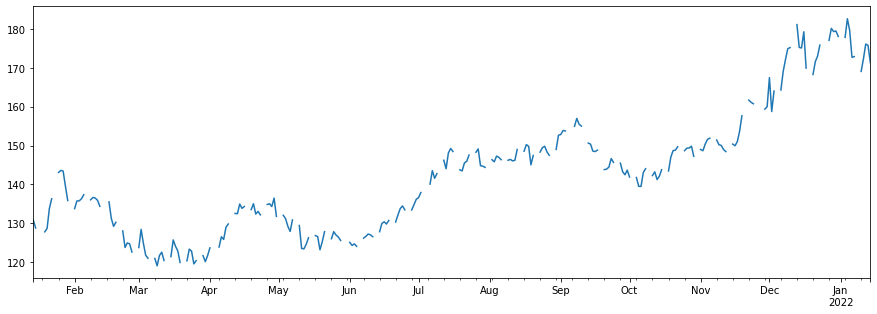

In [53]:
# we will learn the code in the next week
price.plot(figsize = (15,5)); 

We can see there is some missing data.

## Fill missing data: forward fill

* We can provide`fillna()` with different methods. For example: 
    * `method = 'ffill'`: 'forward fill' with the previous value 

In [54]:
ffill_price = price.fillna(method = 'ffill')
pd.DataFrame({'original': price, 'ffill': ffill_price}).head(7)

,original,ffill
2021-01-14,130.800003,130.800003
2021-01-15,128.779999,128.779999
2021-01-16,NaN,128.779999
2021-01-17,NaN,128.779999
2021-01-18,NaN,128.779999
2021-01-19,127.779999,127.779999
2021-01-20,128.660004,128.660004


It is a sensible way to fill the data here as there is missing data because the market was not open on those days (e.g. weekend or public holiday). 

## Fill missing data: linear interpolation

Another way you can fill the missing data with linear average, with the use of `interpolate(method = 'linear')`. For example:

In [55]:
linear_fill_price = price.interpolate(method='linear')
pd.DataFrame({'original': price, 'linear_fill': linear_fill_price}).head(7)

,original,linear_fill
2021-01-14,130.800003,130.800003
2021-01-15,128.779999,128.779999
2021-01-16,NaN,128.529999
2021-01-17,NaN,128.279999
2021-01-18,NaN,128.029999
2021-01-19,127.779999,127.779999
2021-01-20,128.660004,128.660004


## More on filling missing data using linear interpolation

Linear averaging a simple way to fill the missing data if there is some (simple) pattens in the data. For example:

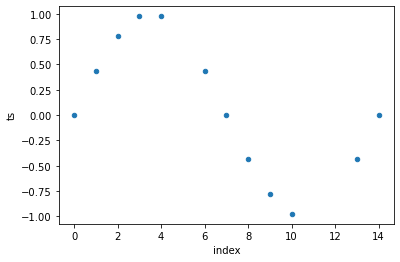

In [56]:
import numpy as np
import matplotlib.pyplot as plt
n = 15
ts = np.sin(np.linspace(0, 2*np.pi, n))
np.random.seed(1)
ts[np.random.randint(n, size = 3)] = np.nan
ts = pd.DataFrame({'ts':ts}, index = np.arange(n))
ts.reset_index().plot.scatter(x = 'index', y = 'ts');

## More on filling missing data using linear interpolation (continue)

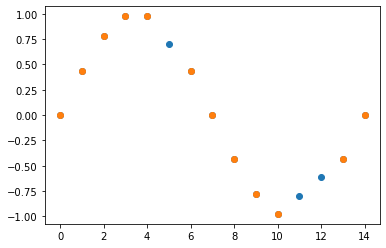

In [57]:
linear_fill_ts = ts.interpolate(method='linear')
plt.scatter(y = linear_fill_ts, x = np.arange(n));
plt.scatter(y = ts['ts'], x = np.arange(n));

Pandas also provides other interpolation methods. See [here](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.interpolate.html) to learn more.

## Filling missing data: graphical illustration

Let us graphically illustrate how the missing data is filled with two different methods:

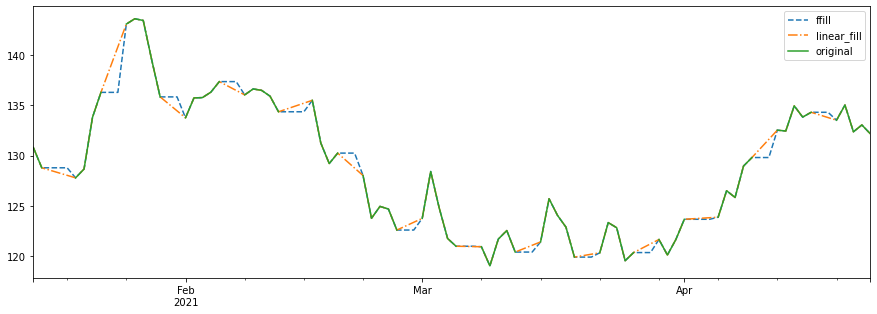

In [58]:
linear_fill_price = price.interpolate(method='linear')
ffill_price = price.fillna(method = 'ffill')
pd.DataFrame({'ffill': ffill_price, 'linear_fill': linear_fill_price, 
              'original': price})[:100]\
    .plot(figsize = (15,5), style = ['--', '-.', '-']);

## More on handling missing data

There are some other ways to handle missing data. For example:
* Randomly fill the missing data
* Model the imputation 
* Use missingness indicator variable
    
But we are not going to discuss them in this course.

## Summary

* Data exploration
* Data wrangling 
    * Handling missing data

## Preview of workshop

More on data wrangling with Pandas
* Merging data
* Data aggregation
* Reshaping data with pivot table

## Reading resources

* [10 minutes to Pandas](https://pandas.pydata.org/pandas-docs/stable/user_guide/10min.html)
* Python for Data Analysis Ch 5, 6.1 (before JSON), 7.1-7.2

In [35]:
grade = pd.DataFrame({'names': ['Amber', 'Andy', 'Peter', 'Judy', 'Jerry'],
                                           'score': [86, 90, np.nan, 75, 53]})
grade

,names,score
0,Amber,86.0
1,Andy,90.0
2,Peter,NaN
3,Judy,75.0
4,Jerry,53.0


In [59]:
grade['score'].median()

80.5

In [43]:
grade['names'][2]

'Peter'

In [47]:
grade.shape

(5, 2)

In [49]:
grade.dropna().shape

(4, 2)

In [56]:
grade['score'].isnull().sum()

1

In [61]:
grade['score'].value_counts

<bound method IndexOpsMixin.value_counts of 0    86.0
1    90.0
2     NaN
3    75.0
4    53.0
Name: score, dtype: float64>

In [62]:
grade = pd.DataFrame({'name': ['Amber', 'Andy', 'Peter', 'Judy', 'Jerry'],
                                           'score': [86, 90, np.nan, 75, 53], 
                                           'sex': ['Female', 'Male', 'Male', 'Female', 'Female']})

In [64]:
grade['sex'].value_counts()

Female    3
Male      2
Name: sex, dtype: int64

In [71]:
grade.dtypes

dtype('O')